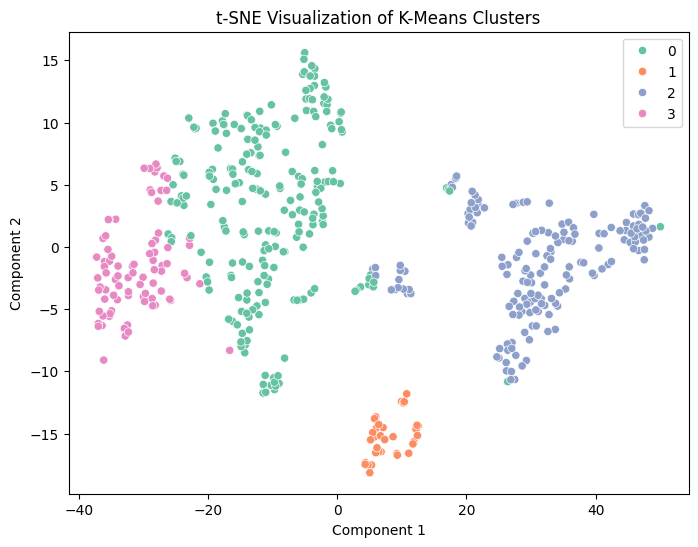

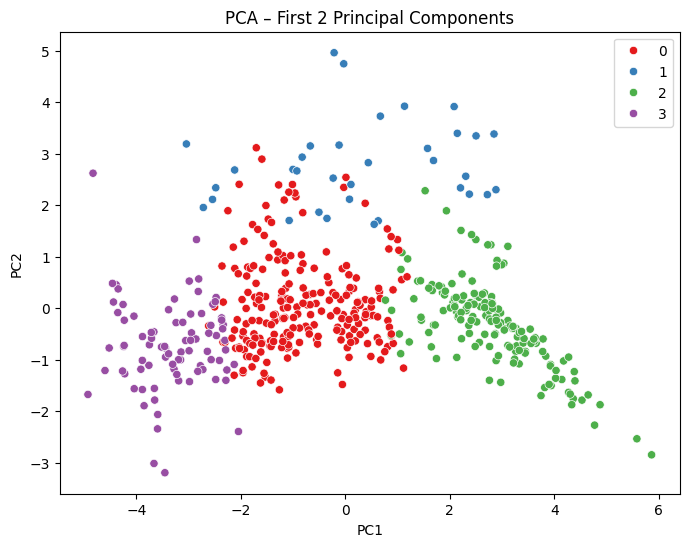

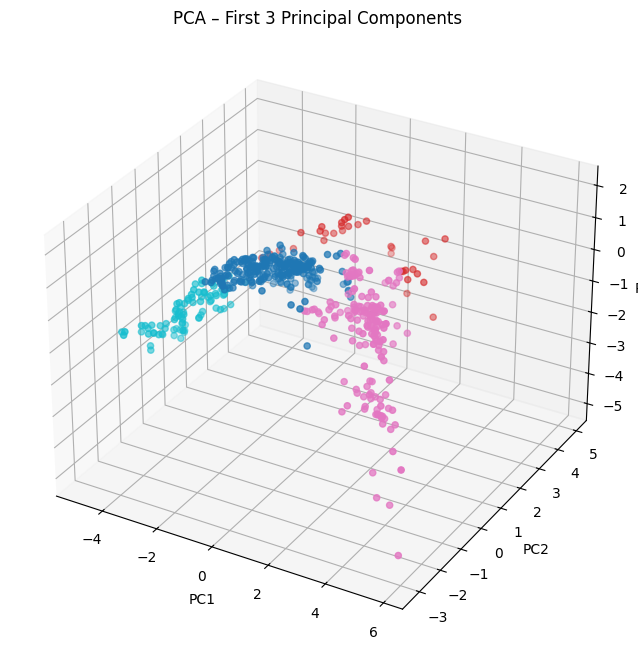


Observation:
In 2D PCA, clusters may overlap more due to projection loss.
3D PCA gives better separation, showing more structure.


In [1]:
# Assignment 2 – Boston Housing & K-Means Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Step 1: Load Boston Housing Data
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert to DataFrame
df = pd.DataFrame(data)
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT"
]

# Drop RAD (categorical)
df = df.drop("RAD", axis=1)

# Step 2: Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

# Step 3: K-Means from scratch
def k_means(X, k=4, max_iters=100, tol=1e-4):
    np.random.seed(42)
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.linalg.norm(centroids - new_centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

labels, centroids = k_means(X, k=4)

# Step 4: t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette="Set2")
plt.title("t-SNE Visualization of K-Means Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# Step 5: PCA for 2D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set1")
plt.title("PCA – First 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Step 6: PCA for 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')
ax.set_title("PCA – First 3 Principal Components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# Step 7: Observations (print only)
print("\nObservation:")
print("In 2D PCA, clusters may overlap more due to projection loss.")
print("3D PCA gives better separation, showing more structure.")
